In [1]:
# 1. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [2]:
# 2. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Kernel SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Train RBF Kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate accuracies
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {acc_linear}")
print(f"RBF Kernel Accuracy: {acc_rbf}")


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [4]:
# 3. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.3320115421348744


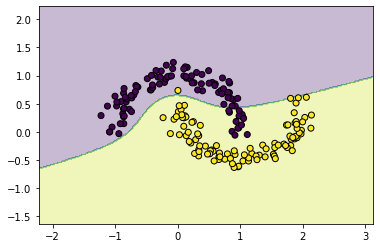

In [5]:
# 4. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load dataset
X, y = datasets.make_moons(n_samples=200, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)

# Visualization
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.show()

plot_decision_boundary(svm_poly, X, y)


In [7]:
# 5. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
breast_cancer = datasets.load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9736842105263158


In [6]:
# 6. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
categories = ['rec.sport.baseball', 'sci.space', 'comp.graphics', 'talk.politics.mideast']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Build text classification pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Train and predict
text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8960205391527599


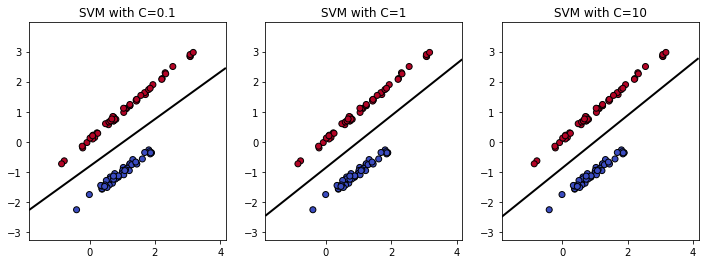

In [28]:
# 7. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM models with different C values
C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)

    # Plot decision boundary
    plt.subplot(1, len(C_values), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Decision boundary
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    plt.title(f"SVM with C={C}")

plt.show()


In [9]:
# 8. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic binary dataset
np.random.seed(42)
X = np.random.randint(2, size=(100, 5))  # 100 samples, 5 binary features
y = np.random.randint(2, size=100)  # Binary labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = bnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.35


In [10]:
# 9. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=200, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
svm_unscaled = SVC(kernel='rbf')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", accuracy_unscaled)
print("Accuracy with scaling:", accuracy_scaled)


Accuracy without scaling: 0.85
Accuracy with scaling: 0.85


In [11]:
# 10. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate dataset
X, y = make_classification(n_samples=200, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without Laplace Smoothing
gnb_no_smoothing = GaussianNB(var_smoothing=0)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)

# With Laplace Smoothing
gnb_smoothing = GaussianNB()
gnb_smoothing.fit(X_train, y_train)
y_pred_smoothing = gnb_smoothing.predict(X_test)

print("Accuracy without Laplace Smoothing:", accuracy_score(y_test, y_pred_no_smoothing))
print("Accuracy with Laplace Smoothing:", accuracy_score(y_test, y_pred_smoothing))


Accuracy without Laplace Smoothing: 0.85
Accuracy with Laplace Smoothing: 0.85


In [12]:
# 11. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

# Generate dataset
X, y = make_classification(n_samples=200, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}

# GridSearchCV
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.86875


In [13]:
# 12. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting to check if it improves accuracy.

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate imbalanced dataset
X, y = make_classification(n_samples=500, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without class weighting
svm_no_weight = SVC(kernel='rbf')
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)

# With class weighting
svm_weighted = SVC(kernel='rbf', class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

print("Accuracy without class weighting:", accuracy_score(y_test, y_pred_no_weight))
print("Accuracy with class weighting:", accuracy_score(y_test, y_pred_weighted))


Accuracy without class weighting: 0.94
Accuracy with class weighting: 0.91


In [14]:
# 13. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample email dataset
emails = ["Win a free iPhone now!", "Your bank account needs verification", 
          "Meeting at 3 PM", "Hey, how are you?", "You won $1000!", "Lunch at noon?"]
labels = [1, 1, 0, 0, 1, 0]  # 1 = spam, 0 = not spam

# Convert text to feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Train Naïve Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


In [15]:
# 14. Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 1.0


In [16]:
# 15. Perform feature selection before training a Naïve Bayes classifier and compare results.

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=300, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without feature selection
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_no_fs = nb.predict(X_test)

# With feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_fs = GaussianNB()
nb_fs.fit(X_train_selected, y_train)
y_pred_fs = nb_fs.predict(X_test_selected)

print("Accuracy without feature selection:", accuracy_score(y_test, y_pred_no_fs))
print("Accuracy with feature selection:", accuracy_score(y_test, y_pred_fs))


Accuracy without feature selection: 0.9166666666666666
Accuracy with feature selection: 0.9333333333333333


In [17]:
# 16. Train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) on the Wine dataset and compare accuracy.

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-vs-Rest (OvR)
svm_ovr = SVC(decision_function_shape='ovr')
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)

# One-vs-One (OvO)
svm_ovo = SVC(decision_function_shape='ovo')
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)

print("OvR Accuracy:", accuracy_score(y_test, y_pred_ovr))
print("OvO Accuracy:", accuracy_score(y_test, y_pred_ovo))


OvR Accuracy: 0.8055555555555556
OvO Accuracy: 0.8055555555555556


In [18]:
# 17. Train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare accuracy.

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Accuracy with {kernel} kernel:", accuracy_score(y_test, y_pred))


Accuracy with linear kernel: 0.956140350877193
Accuracy with poly kernel: 0.9473684210526315
Accuracy with rbf kernel: 0.9473684210526315


In [19]:
# 18. Train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.datasets import make_classification

# Generate dataset
X, y = make_classification(n_samples=300, n_features=5, random_state=42)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm = SVC(kernel='rbf')

# Compute accuracy
scores = cross_val_score(svm, X, y, cv=skf)
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9533333333333334


In [20]:
# 19. Train a Naïve Bayes classifier using different prior probabilities and compare performance.

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default prior
nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)

# Custom prior
nb_custom = GaussianNB(priors=[0.3, 0.7])  # Adjusted class probability distribution
nb_custom.fit(X_train, y_train)
y_pred_custom = nb_custom.predict(X_test)

print("Accuracy with default prior:", accuracy_score(y_test, y_pred_default))
print("Accuracy with custom prior:", accuracy_score(y_test, y_pred_custom))


Accuracy with default prior: 1.0
Accuracy with custom prior: 1.0


In [21]:
# 20. Perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=300, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without feature elimination
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_no_rfe = svm.predict(X_test)

# With RFE
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)

print("Accuracy without RFE:", accuracy_score(y_test, y_pred_no_rfe))
print("Accuracy with RFE:", accuracy_score(y_test, y_pred_rfe))


Accuracy without RFE: 0.9333333333333333
Accuracy with RFE: 0.9333333333333333


In [22]:
# 21. Train an SVM Classifier and evaluate using Precision, Recall, and F1-Score.

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate dataset
X, y = make_classification(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [23]:
# 22. Train a Naïve Bayes Classifier and evaluate using Log Loss (Cross-Entropy Loss).

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

# Generate dataset
X, y = make_classification(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_proba = nb.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_pred_proba))


Log Loss: 0.005014287370172229


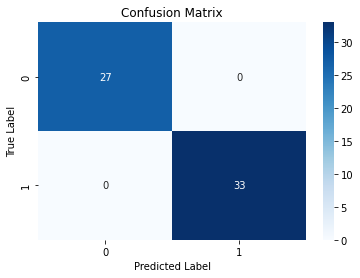

In [24]:
# 23. Train an SVM Classifier and visualize the Confusion Matrix using seaborn.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

# Generate dataset
X, y = make_classification(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [25]:
# 24. Train an SVM Regressor (SVR) and evaluate using Mean Absolute Error (MAE).

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

# Generate dataset
X, y = make_regression(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


Mean Absolute Error (MAE): 74.04234538499671


In [26]:
# 25. Train a Naïve Bayes classifier and evaluate using ROC-AUC score.

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

# Generate dataset
X, y = make_classification(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_proba = nb.predict_proba(X_test)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC Score: 1.0


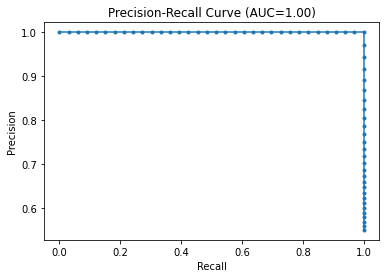

In [27]:
# 26. Train an SVM Classifier and visualize the Precision-Recall Curve.

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve, auc

# Generate dataset
X, y = make_classification(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot the curve
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AUC={pr_auc:.2f})")
plt.show()
